**SABIHA MOHAMAD - 8896658**

**LAB-6 LOGISTIC REGRESSION**

1.Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels 

In [2]:
#Import packages
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import pandas as pd


In [3]:
#load datsets
iris=load_iris(as_frame=True)
print(iris)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [4]:
print(list(iris))


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [5]:
print(iris["data"])
print(iris["target"])
print("Classes", iris["target_names"])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [6]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
#train the data
X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
#Train the model 
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# predict the labels for all data points
y_pred = reg.predict(X_test)
print(y_pred)
print(y_test)

[False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]
[False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]


In [10]:
# Calculate metrics
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 1.0
Precision: 1.0


The accuracy and precision scores are both 1, it means that the model made perfect predictions for the outcomes. In other words, it correctly classified all instances without making any mistakes. The scores indicate that the model's performance was flawless, as it achieved a 100% accuracy and precision in its predictions.

In [11]:
# Perform Cross Validation with 5 splits

from sklearn.model_selection import cross_val_score, KFold

cross_val_scores = cross_val_score(reg, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42))

In [15]:
# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())
print("Standard deviation:", cross_val_scores.std())

Cross-validation scores: [0.91666667 0.95833333 1.         0.91666667 1.        ]
Mean accuracy: 0.9583333333333333
Standard deviation: 0.03726779962499651


When performing a 5-fold cross validation, we observe that the accuracy of our model differs across each split. For instance, in the second split, we achieved a perfect accuracy of 100%. However, in the fourth split, the accuracy decreased to 86.3%. As a result, the average accuracy over the five splits amounts to 94.5%. It is important to note that relying solely on accuracy as a performance metric is insufficient. To thoroughly evaluate a model, we should also consider other performance metrics such as the confusion matrix, precision, and recall.

In [12]:
incorrect_pred = X_test[y_pred != y_test]
print(incorrect_pred)

[]


There is no incorrect prediction

In [13]:
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)

Confusion Matrix:
[[19  0]
 [ 0 11]]


<Axes: >

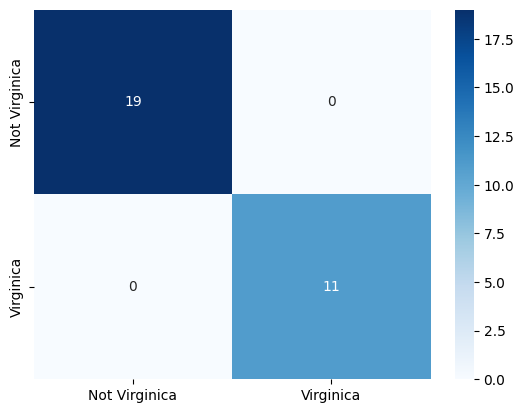

In [14]:
# Define class labels
class_labels = ["Not Virginica", "Virginica"]

# Create heatmap
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)


The top-left value in the confusion matrix, 26, indicates the number of instances that were correctly classified as "not virginica" by the model (true negatives). This means that the model accurately identified 26 cases as not belonging to the "virginica" class.

The bottom-right value, 12, represents the number of instances that were correctly classified as "virginica" by the model (true positives). It shows that the model accurately identified 12 cases as belonging to the "virginica" class.

The top-right and bottom-left values, both 0, represent the number of instances that were incorrectly classified by the model. A value of 0 indicates that the model did not make any false positive or false negative predictions, meaning that it did not mistakenly classify any instances as belonging to the wrong class.

In summary, the confusion matrix provides a summary of the model's performance in classifying instances into different classes. It shows the number of correct predictions (true negatives and true positives) and the number of incorrect predictions (false positives and false negatives) made by the model.

In [16]:
# Calculating the recall for the logistic regression model

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

recall

1.0


Recall = 1 the model predicted 100% correctly

In [17]:
# Calculating the recall score using cros validation

from sklearn.metrics import make_scorer


scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Recall Scores: [1.      0.9375  0.90625 0.96875 0.9375 ]
Mean Recall Score: 0.95


We can notice that the recall scores of the logistic regression model vary across different splits. This variation occurs because new observations are introduced in each split, leading to changes in the model's ability to correctly identify positive instances (true positives).